In [16]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [17]:
mnist=input_data.read_data_sets('MNIST_data/', one_hot=True)
mnist

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001FFD74184E0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001FFDDDDB198>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001FFDDDDB0B8>)

In [18]:
mnist.train.images.shape

(55000, 784)

In [19]:
mnist.test.images.shape

(10000, 784)

In [20]:
mnist.validation.images.shape

(5000, 784)

In [21]:
mnist.train.labels.shape

(55000, 10)

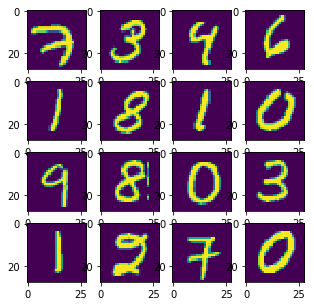

In [22]:
import numpy as np
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5, 5))
for i in range(16):
    ax=fig.add_subplot(4, 4, i+1)
    ax.imshow(mnist.train.images[i].reshape((28, 28)))
plt.show()

In [23]:
n_inputs=784
n_hidden1=1000
n_hidden2=1000
n_hidden3=1000
n_hidden4=1000
n_classes=10
weights={"h1":tf.Variable(tf.random_normal((n_inputs, n_hidden1))),
        "h2":tf.Variable(tf.random_normal((n_hidden1, n_hidden2))),
        "h3":tf.Variable(tf.random_normal((n_hidden2, n_hidden3))),
        "h4":tf.Variable(tf.random_normal((n_hidden3, n_hidden4))),
        "output":tf.Variable(tf.random_normal((n_hidden4, n_classes)))}
biases={"h1":tf.Variable(tf.random_normal((n_hidden1, ))),
       "h2":tf.Variable(tf.random_normal((n_hidden2, ))),
        "h3":tf.Variable(tf.random_normal((n_hidden3, ))),
        "h4":tf.Variable(tf.random_normal((n_hidden4, ))),
       "output":tf.Variable(tf.random_normal((n_classes, )))}

In [24]:
def forward_propagation(x, weights, biases):
    hidden_layer1_input=tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    hidden_layer1_output=tf.nn.selu(hidden_layer1_input)
    
    hidden_layer2_input=tf.add(tf.matmul(hidden_layer1_output, weights['h2']), biases['h2'])
    hidden_layer2_output=tf.nn.tanh(hidden_layer2_input)
    
    hidden_layer3_input=tf.add(tf.matmul(hidden_layer2_output, weights['h3']), biases['h3'])
    hidden_layer3_output=tf.nn.relu(hidden_layer3_input)
    
    hidden_layer4_input=tf.add(tf.matmul(hidden_layer3_output, weights['h4']), biases['h4'])
    hidden_layer4_output=tf.nn.relu(hidden_layer4_input)
    
    output=tf.add(tf.matmul(hidden_layer4_output, weights['output']), biases['output'])
    
    return output

In [25]:
x=tf.placeholder("float" , shape=(None, n_inputs))
y=tf.placeholder(tf.int32 , shape=(None, n_classes))

In [26]:
pred_hot_encoded=forward_propagation(x, weights, biases)

In [27]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred_hot_encoded, labels=y))
cost

<tf.Tensor 'Mean_1:0' shape=() dtype=float32>

In [28]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.0001)
optimize=optimizer.minimize(cost)

In [29]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [30]:
batch_size=500

for i in range(25):
    number_of_batches=int(mnist.train.num_examples/batch_size)
    error=0
    for j in range(number_of_batches):
        batch_x, batch_y=mnist.train.next_batch(batch_size)
        c, _=sess.run([cost, optimize], feed_dict={x:batch_x, y:batch_y})
        error+=c
    print(c)

5953.6196
4609.78
2947.4731
2234.3684
1568.9701
1223.957
1371.735
1131.3684
841.21063
742.31964
896.7578
1052.8606
591.08936
734.758
696.8566
446.80075
498.0049
498.05212
399.5022
367.89072
268.13278
446.18976
245.84875
310.30075
208.80441


In [31]:
pred_predicted=tf.argmax(pred_hot_encoded, axis=1)
pred_true=tf.argmax(y, axis=1)
pred_eval_predicted, pred_eval_true=sess.run([pred_predicted, pred_true], feed_dict={x:mnist.train.images, y:mnist.train.labels})

In [32]:
print("score:", sum(pred_eval_predicted==pred_eval_true)*100/len(pred_eval_predicted))

score: 94.68
